## Transfer Learning for Image Classification

#### Unzipping the dataset

In [1]:
#Necessary libraries for modelling
!pip install --upgrade tensorflow
!pip install --upgrade keras
!pip install Pillow
!pip install seaborn

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.8/dist-packages (2.13.1)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Requirement already up-to-date: keras in /usr/local/lib/python3.8/dist-packages (2.13.1)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.8/dist-packages (1.3.2)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import pandas as pd

In [4]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current directory
print("Current Directory:", current_directory)

Current Directory: /tf/trailanderror/CatvsDog


In [6]:
import os
import zipfile

def unzip_nested_zip(zip_file_path, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Extract the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(output_folder)
    
    print(f"Unzipped '{zip_file_path}' to '{output_folder}'.")
    
    # Check for nested zip files and unzip them recursively
    extracted_files = os.listdir(output_folder)
    for extracted_file in extracted_files:
        extracted_file_path = os.path.join(output_folder, extracted_file)
        if extracted_file_path.endswith('.zip') and zipfile.is_zipfile(extracted_file_path):
            # Recursive call to handle nested zip files
            unzip_nested_zip(extracted_file_path, os.path.splitext(extracted_file_path)[0])

In [7]:
# Specify the path to the initial zip folder
initial_zip_folder_path = "/tf/trailanderror/CatvsDog/Cat vs Dog.zip"

# Specify the output folder where contents will be extracted
output_folder = "/tf/trailanderror/CatvsDog"

# Call the function to recursively unzip folders within folders and nested zip files
unzip_nested_zip(initial_zip_folder_path, output_folder)


Unzipped '/tf/trailanderror/CatvsDog/Cat vs Dog.zip' to '/tf/trailanderror/CatvsDog'.
Unzipped '/tf/trailanderror/CatvsDog/Cat vs Dog.zip' to '/tf/trailanderror/CatvsDog/Cat vs Dog'.


In [8]:
from PIL import Image

In [9]:
images = []
labels = []

master_data_path="/tf/trailanderror/CatvsDog"

def load_images_from_folder(folder_path, label):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isdir(file_path):
            # If the item is a directory, recursively load images from it
            load_images_from_folder(file_path, filename)
        elif filename.lower().endswith(('png', 'jpg', 'jpeg')):
            # If the item is an image file, load it and add it to the images list
            try:
                img = Image.open(file_path)
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f'Error loading image {file_path}: {str(e)}')
        else:
            print(f'Skipping non-image file: {file_path}')

# Iterate through folders in the master folder
for folder_name in os.listdir(master_data_path):
    folder_path = os.path.join(master_data_path, folder_name)
    if os.path.isdir(folder_path):
        # Load images and labels from the current folder
        load_images_from_folder(folder_path, folder_name)

print(f'Images loaded: {len(images)}')
print(f'Labels loaded: {len(labels)}')

Skipping non-image file: /tf/trailanderror/CatvsDog/.ipynb_checkpoints/Cat vs Dog-checkpoint.ipynb
Skipping non-image file: /tf/trailanderror/CatvsDog/Cat vs Dog/readme[1].txt
Skipping non-image file: /tf/trailanderror/CatvsDog/Cat vs Dog/MSR-LA - 3467.docx
Skipping non-image file: /tf/trailanderror/CatvsDog/Cat vs Dog/PetImages/Cat/Thumbs.db
Error loading image /tf/trailanderror/CatvsDog/Cat vs Dog/PetImages/Cat/666.jpg: cannot identify image file '/tf/trailanderror/CatvsDog/Cat vs Dog/PetImages/Cat/666.jpg'


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:850: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Skipping non-image file: /tf/trailanderror/CatvsDog/Cat vs Dog/PetImages/Dog/Thumbs.db
Error loading image /tf/trailanderror/CatvsDog/Cat vs Dog/PetImages/Dog/11702.jpg: cannot identify image file '/tf/trailanderror/CatvsDog/Cat vs Dog/PetImages/Dog/11702.jpg'
Skipping non-image file: /tf/trailanderror/CatvsDog/PetImages/Cat/Thumbs.db
Error loading image /tf/trailanderror/CatvsDog/PetImages/Cat/666.jpg: cannot identify image file '/tf/trailanderror/CatvsDog/PetImages/Cat/666.jpg'
Skipping non-image file: /tf/trailanderror/CatvsDog/PetImages/Dog/Thumbs.db
Error loading image /tf/trailanderror/CatvsDog/PetImages/Dog/11702.jpg: cannot identify image file '/tf/trailanderror/CatvsDog/PetImages/Dog/11702.jpg'
Images loaded: 49996
Labels loaded: 49996


In [10]:
import matplotlib.pyplot as plt

Cat


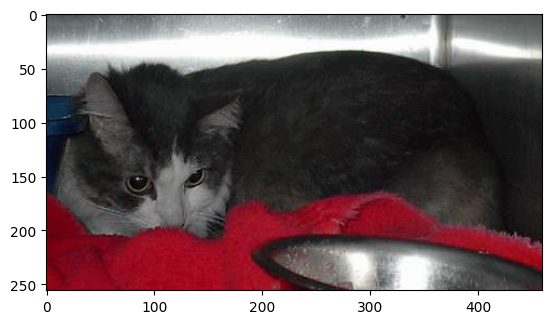

Cat


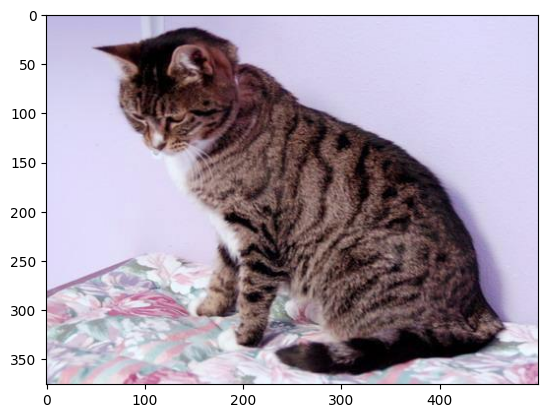

In [11]:
# Iterate through the first two elements of labels and images
for label, image in zip(labels[0:2], images[0:2]):
    print(label)
    plt.imshow(image)
    plt.show()


In [12]:
unique_labels = list(set(labels))
print(unique_labels)

['Cat', 'Dog']


### Data Processing

In [17]:
Dimensions = []

for idx, img in enumerate(images):
    width, height = img.size
    current_dimension = (width, height)
    Dimensions.append(current_dimension)

unique_dimension_count = len(list(set(Dimensions)))

print(f'we have images with {unique_dimension_count} various dimensions')

we have images with 7512 various dimensions


#### Image :- we have to convert all the images to have same dimesion and normalize them

In [18]:
import numpy as np

In [19]:
# Convert PIL images to numpy arrays
numpy_images = [np.array(image) for image in images]

# Resize and convert images to RGB format if necessary
target_size = (224, 224)
reshaped_images = []
for idx, image in enumerate(numpy_images):
    pil_image = Image.fromarray(image)
    pil_image = pil_image.resize(target_size)
    # Convert to RGB if image is grayscale
    if pil_image.mode != 'RGB':
        pil_image = pil_image.convert('RGB')
    reshaped_images.append(np.array(pil_image))

# Shape of reshaped images
for idx, img in enumerate(reshaped_images):
    print(f'Image {idx+1} shape after resizing {img.shape}')


Image 1 shape after resizing (224, 224, 3)
Image 2 shape after resizing (224, 224, 3)
Image 3 shape after resizing (224, 224, 3)
Image 4 shape after resizing (224, 224, 3)
Image 5 shape after resizing (224, 224, 3)
Image 6 shape after resizing (224, 224, 3)
Image 7 shape after resizing (224, 224, 3)
Image 8 shape after resizing (224, 224, 3)
Image 9 shape after resizing (224, 224, 3)
Image 10 shape after resizing (224, 224, 3)
Image 11 shape after resizing (224, 224, 3)
Image 12 shape after resizing (224, 224, 3)
Image 13 shape after resizing (224, 224, 3)
Image 14 shape after resizing (224, 224, 3)
Image 15 shape after resizing (224, 224, 3)
Image 16 shape after resizing (224, 224, 3)
Image 17 shape after resizing (224, 224, 3)
Image 18 shape after resizing (224, 224, 3)
Image 19 shape after resizing (224, 224, 3)
Image 20 shape after resizing (224, 224, 3)
Image 21 shape after resizing (224, 224, 3)
Image 22 shape after resizing (224, 224, 3)
Image 23 shape after resizing (224, 224, 

In [20]:
Dimensions = []

for idx, img in enumerate(reshaped_images):
    width, height, channel = img.shape
    current_dimension = width, height, channel
    Dimensions.append(current_dimension)
    
unique_dimension_count_after_reshaping = len(list(set(Dimensions)))

print(f'Number of unique dimension: {unique_dimension_count_after_reshaping}')

print("Dimension of reshaped_images:", reshaped_images[0].shape)

print("Data type of reshaped_images:", reshaped_images[0].dtype)
                    

Number of unique dimension: 1
Dimension of reshaped_images: (224, 224, 3)
Data type of reshaped_images: uint8


In [21]:
# Convert images to float32 and normalize to [0, 1]
normalized_images = np.array(reshaped_images, dtype=np.float32) / 255.0

# Verify the shape and data type of processed_images
print("Shape of normalized_images:", normalized_images.shape)
print("Data type of processed_images:", normalized_images.dtype)

Shape of normalized_images: (49996, 224, 224, 3)
Data type of processed_images: float32


Cat


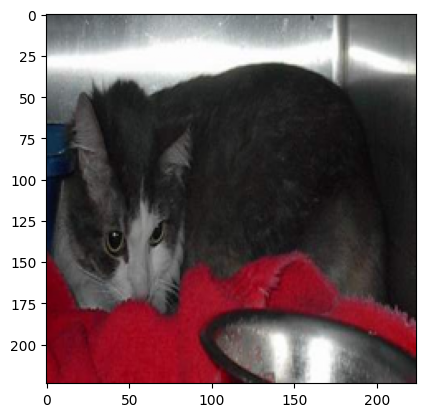

In [22]:
print(labels[0])
plt.imshow(normalized_images[0])
plt.show()

## Handling Data imbalance :- 

The data is significantly imbalanced, so data balancing is essential to prevent the model from biassing towards ships.

In [23]:
#counting the number of labels in each classes

count_of_classes = {}

for label in labels:
    if label in count_of_classes:
        count_of_classes[label] +=1
    else:
        count_of_classes[label] = 1
        
        
for key, value in count_of_classes.items():
    print(f'{key}:{value}')

Cat:24998
Dog:24998


#### The data is already balanced so doesn't require balancing.

In [24]:
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [25]:
# Initialize empty lists to store processed images and corresponding labels
processed_images = []
processed_labels = []

# Load, preprocess, and align images and labels
for image, label in zip(normalized_images, labels):
    try:
        processed_images.append(image)
        processed_labels.append(label)
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(processed_labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_labels = integer_encoded_labels.reshape(len(integer_encoded_labels), 1)
onehot_encoded_labels = onehot_encoder.fit_transform(integer_encoded_labels)

# Convert processed_images and onehot_encoded_labels to numpy arrays
processed_images = np.array(processed_images)
onehot_encoded_labels = np.array(onehot_encoded_labels)

# Save processed_images and onehot_encoded_labels in the current directory
np.save("processed_images_fr.npy", processed_images)
np.save("onehot_encoded_labels_fr.npy", onehot_encoded_labels)

# Verify the shapes of processed_images and onehot_encoded_labels
print("Shape of processed_images:", processed_images.shape)
print("Shape of onehot_encoded_labels:", onehot_encoded_labels.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Shape of processed_images: (49996, 224, 224, 3)
Shape of onehot_encoded_labels: (49996, 2)


# Model Selection and Transfer Learning

## Base Models

In [26]:
# Import ResNeXt50 from tensorflow.keras.applications
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, InceptionV3, DenseNet121, MobileNetV2

In [27]:
# ResNeXt50, SEResNet50 ; we have to manually import as they not available directly through tf.keras.applications 
# or import from torch #

#importing the model & dense layer for customizing the neural network
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [28]:
#input shape & dimension for the pre-trained models
shape=(224, 224, 3)

In [29]:
# Load pre-trained models
base_model_1 = VGG16(weights='imagenet', include_top=False, input_shape=shape)
base_model_2 = VGG19(weights='imagenet', include_top=False, input_shape=shape)
base_model_3 = ResNet50(weights='imagenet', include_top=False, input_shape=shape)
base_model_4 = InceptionV3(weights='imagenet', include_top=False, input_shape=shape)
base_model_5 = DenseNet121(weights='imagenet', include_top=False, input_shape=shape)
base_model_6 = MobileNetV2(weights='imagenet', include_top=False, input_shape=shape)

In [30]:
base_models = [base_model_1, base_model_2, base_model_3, base_model_4, base_model_5, base_model_6]

In [31]:
# Looping through the Base models and printing the summaries
for idx, model in enumerate(base_models):
    print(f'Summary of Base Model {idx +1}:')
    model.summary()

Summary of Base Model 1:
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 

In [32]:
#Freezing the pre-trained model's last layer for transfer learning
for model in base_models:
    for layer in model.layers:
        layer.trainable=False

## Customize & Compile the Base Models

In [33]:
base_models = [base_model_1, base_model_2, base_model_3, base_model_4, base_model_5, base_model_6]

custom_models = []

for idx, model in enumerate(base_models):
    x = model.output
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(2, activation='softmax')(x)
    custom_model = Model(inputs=model.input, outputs=predictions)
    custom_models.append(custom_model)
    print(f"Customized the model - {idx+1}")

Customized the model - 1
Customized the model - 2
Customized the model - 3
Customized the model - 4
Customized the model - 5
Customized the model - 6


In [34]:
# Looping through the Base models and printing the summaries
for idx, model in enumerate(custom_models):
    print(f'Summary of Custom Model {idx +1}:')
    model.summary()

Summary of Custom Model 1:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None

In [35]:
compiled_models = []
for idx, custom_model in enumerate(custom_models):
    custom_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    compiled_models.append(custom_model)
    print(f"Compiled Custom Model {idx + 1}")

Compiled Custom Model 1
Compiled Custom Model 2
Compiled Custom Model 3
Compiled Custom Model 4
Compiled Custom Model 5
Compiled Custom Model 6


## Train the model using the Augmented_FR Data

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, ZeroPadding2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [38]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_images, onehot_encoded_labels, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (39996, 224, 224, 3)
Shape of y_train: (39996, 2)
Shape of X_test: (10000, 224, 224, 3)
Shape of y_test: (10000, 2)


In [39]:
model_names = ["VGG16", "VGG19", "ResNet50", "InceptionV3", "DenseNet121", "MobileNetV2"]
class_labels = ['Cat', 'Dog']

In [42]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test, compiled_models, model_names, epochs=100):
    results = []
    for model, model_name in zip(compiled_models, model_names):
        # Initialize variables for tracking maximum accuracy
        max_accuracy = 0
        max_accuracy_epoch = 0

        # Define a checkpoint to save the model when target accuracy is reached
        checkpoint = ModelCheckpoint(f'{model_name}_model_FR.h5', monitor='val_accuracy', 
                                     save_best_only=True, save_weights_only=False, mode='max', verbose=1)

        # Define early stopping to stop training if accuracy doesn't improve for 10 epochs
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

        # Train the current model 
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=32, callbacks=[checkpoint, early_stopping])
        
        
        current_epoch_predictions = []
        current_epoch_labels = []
        
        for epoch, val_accuracy in enumerate(history.history['val_accuracy'], 1):
            # Check if the current epoch achieves higher accuracy than the previous maximum
            if val_accuracy > max_accuracy:
                max_accuracy = val_accuracy
                max_accuracy_epoch = epoch
                current_epoch_predictions = model.predict(X_test)
                current_epoch_labels = y_test.argmax(axis=1)

        # Get the maximum accuracy and the corresponding epoch
        max_accuracy_epoch = np.argmax(history.history['val_accuracy'])
        max_accuracy = history.history['val_accuracy'][max_accuracy_epoch]

        # Evaluate the model on the test data
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f'Test Accuracy for {model_name}: {test_accuracy}')

        # Store results
        results.append({'Model': model_name, 'Accuracy': max_accuracy})

        print("-" * 40)  # Print a line of dashes 
        print(f"Maximum accuracy of {max_accuracy:.2f} achieved at epoch {max_accuracy_epoch+1}")
        print("Model with high accuracy is saved using the keras ModelCheckpoint")
        print("-" * 40)  # Print a line of dashes 
        print("\n")

        # Assuming model.predict returns probabilities for each class
        y_pred_probs = model.predict(X_test)

        # Convert probabilities to class labels
        y_pred = np.argmax(y_pred_probs, axis=1)

        # Convert true labels to class labels if y_test is one-hot encoded
        y_true = np.argmax(y_test, axis=1)

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(model_name)
        plt.show()
    return results


Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 0.9969
Epoch 1: val_accuracy improved from -inf to 0.98780, saving model to VGG16_model_FR.h5


/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 1055s 844ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0674 - val_accuracy: 0.9878
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9990
Epoch 2: val_accuracy did not improve from 0.98780
1250/1250 [==============================] - 1304s 1s/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.1038 - val_accuracy: 0.9826
Epoch 3/100
1250/1250 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9963
Epoch 3: val_accuracy did not improve from 0.98780
1250/1250 [==============================] - 1305s 1s/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0954 - val_accuracy: 0.9809
Epoch 3: early stopping
313/313 [==============================] - 235s 747ms/step - loss: 0.0954 - accuracy: 0.9809
Test Accuracy for VGG16: 0.98089998960495
----------------------------------------
Maximum accuracy of 0.99 achieved at epoch 1
Model with high accuracy is saved using the ker

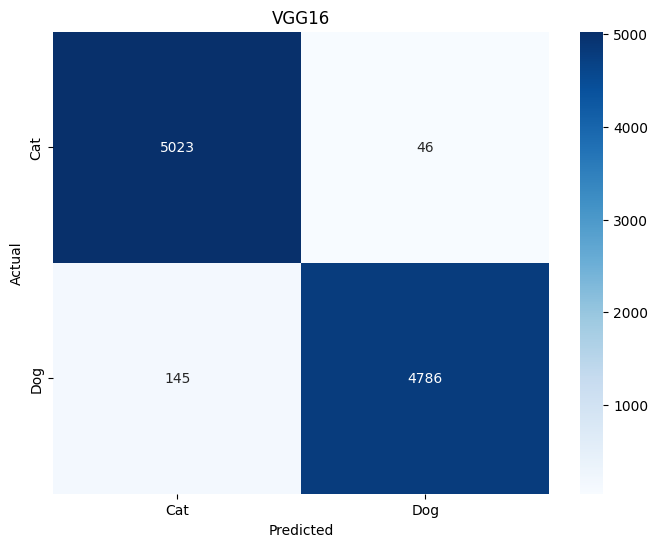

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9940
Epoch 1: val_accuracy improved from -inf to 0.98210, saving model to VGG19_model_FR.h5


/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 1608s 1s/step - loss: 0.0168 - accuracy: 0.9940 - val_loss: 0.0775 - val_accuracy: 0.9821
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9970
Epoch 2: val_accuracy did not improve from 0.98210
1250/1250 [==============================] - 1631s 1s/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0990 - val_accuracy: 0.9780
Epoch 3/100
1250/1250 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9955
Epoch 3: val_accuracy did not improve from 0.98210
1250/1250 [==============================] - 1616s 1s/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0980 - val_accuracy: 0.9760
Epoch 3: early stopping
313/313 [==============================] - 298s 951ms/step - loss: 0.0980 - accuracy: 0.9760
Test Accuracy for VGG19: 0.9760000109672546
----------------------------------------
Maximum accuracy of 0.98 achieved at epoch 1
Model with high accuracy is saved using the kera

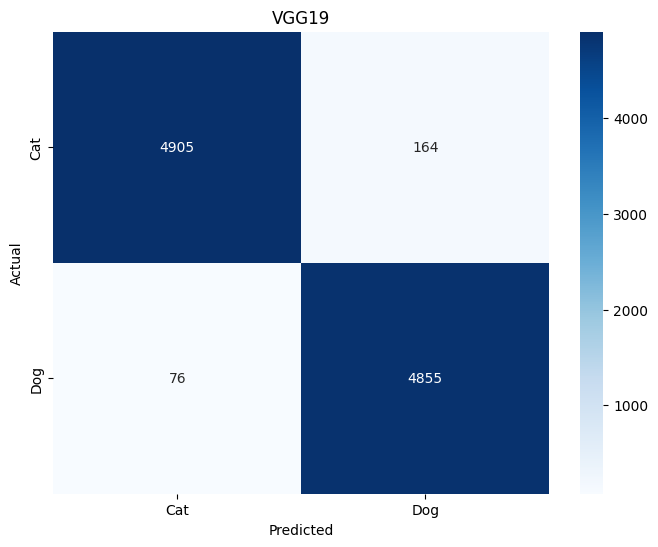

Epoch 1/100
 582/1250 [============>.................] - ETA: 13:31 - loss: 0.5104 - accuracy: 0.7451

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1250/1250 [==============================] - ETA: 0s - loss: 0.5116 - accuracy: 0.7464
Epoch 1: val_accuracy improved from -inf to 0.74360, saving model to ResNet50_model_FR.h5


/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 1792s 1s/step - loss: 0.5116 - accuracy: 0.7464 - val_loss: 0.5299 - val_accuracy: 0.7436
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 0.4980 - accuracy: 0.7549
Epoch 2: val_accuracy did not improve from 0.74360
1250/1250 [==============================] - 1624s 1s/step - loss: 0.4980 - accuracy: 0.7549 - val_loss: 0.5006 - val_accuracy: 0.7435
Epoch 3/100
1250/1250 [==============================] - ETA: 0s - loss: 0.4863 - accuracy: 0.7623
Epoch 3: val_accuracy improved from 0.74360 to 0.76040, saving model to ResNet50_model_FR.h5
1250/1250 [==============================] - 1564s 1s/step - loss: 0.4863 - accuracy: 0.7623 - val_loss: 0.4802 - val_accuracy: 0.7604
Epoch 4/100
1250/1250 [==============================] - ETA: 0s - loss: 0.4832 - accuracy: 0.7642
Epoch 4: val_accuracy did not improve from 0.76040
1250/1250 [==============================] - 1507s 1s/step - loss: 0.4832 - accuracy: 0.7642 - val_loss

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1250/1250 [==============================] - ETA: 0s - loss: 0.4629 - accuracy: 0.7781
Epoch 6: val_accuracy did not improve from 0.77830
1250/1250 [==============================] - 1271s 1s/step - loss: 0.4629 - accuracy: 0.7781 - val_loss: 0.5086 - val_accuracy: 0.7535
Epoch 7/100
1250/1250 [==============================] - ETA: 0s - loss: 0.4665 - accuracy: 0.7739
Epoch 7: val_accuracy did not improve from 0.77830
1250/1250 [==============================] - 1390s 1s/step - loss: 0.4665 - accuracy: 0.7739 - val_loss: 0.5078 - val_accuracy: 0.7506
Epoch 7: early stopping
313/313 [==============================] - 201s 640ms/step - loss: 0.5078 - accuracy: 0.7506
Test Accuracy for ResNet50: 0.7505999803543091
----------------------------------------
Maximum accuracy of 0.78 achieved at epoch 5
Model with high accuracy is saved using the keras ModelCheckpoint
----------------------------------------


313/313 [==============================] - 203s 647ms/step


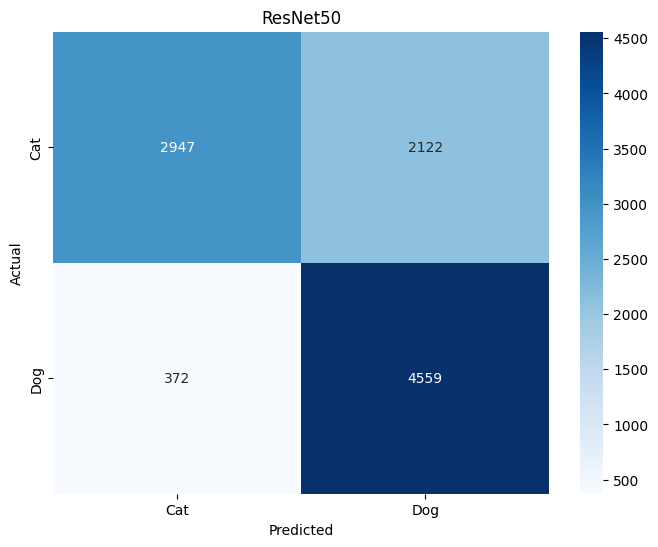

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9972
Epoch 1: val_accuracy improved from -inf to 0.99670, saving model to InceptionV3_model_FR.h5


/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 578s 463ms/step - loss: 0.0130 - accuracy: 0.9972 - val_loss: 0.0227 - val_accuracy: 0.9967
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9967
Epoch 2: val_accuracy did not improve from 0.99670
1250/1250 [==============================] - 751s 601ms/step - loss: 0.0164 - accuracy: 0.9967 - val_loss: 0.0430 - val_accuracy: 0.9955
Epoch 3/100
1250/1250 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9984
Epoch 3: val_accuracy did not improve from 0.99670
1250/1250 [==============================] - 817s 654ms/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 0.0384 - val_accuracy: 0.9948
Epoch 3: early stopping
313/313 [==============================] - 99s 315ms/step - loss: 0.0384 - accuracy: 0.9948
Test Accuracy for InceptionV3: 0.9947999715805054
----------------------------------------
Maximum accuracy of 1.00 achieved at epoch 1
Model with high accuracy is saved usi

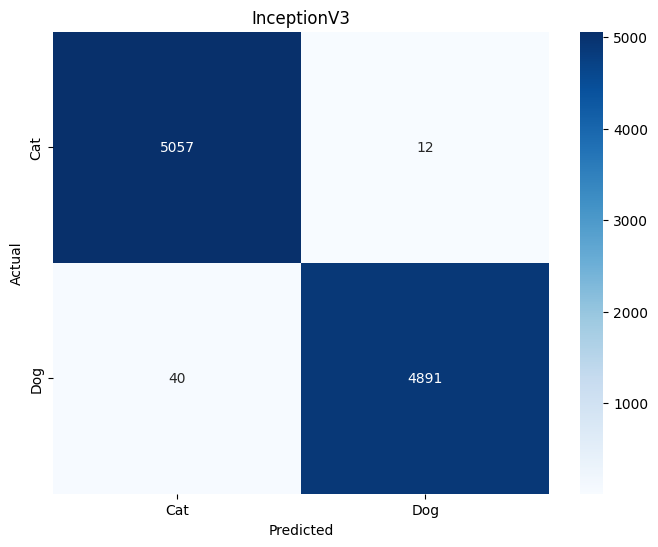

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9981
Epoch 1: val_accuracy improved from -inf to 0.99060, saving model to DenseNet121_model_FR.h5


/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 1674s 1s/step - loss: 0.0083 - accuracy: 0.9981 - val_loss: 0.0596 - val_accuracy: 0.9906
Epoch 2/100
 124/1250 [=>............................] - ETA: 20:51 - loss: 0.0197 - accuracy: 0.9962

In [ ]:
#Train and Evaluate the model
results = train_and_evaluate_models(X_train, y_train, X_test, y_test, compiled_models, model_names, epochs=100)

In [49]:
results_df = pd.DataFrame(results)
# Print results in tabular form
print(results_df)

         Model  Accuracy
0        VGG16    0.9878
1        VGG19    0.9821
2     ResNet50    0.7783
3  InceptionV3    0.9967
4  DenseNet121    0.9948
5  MobileNetV2    0.9958


In [51]:
from tabulate import tabulate


# Define the headers for the table
headers = ["Model", "Test Accuracy"]

# Print the table
print('Transfer Learning - Balanced Data :- 2 Classes')
print(tabulate(results_df, headers, tablefmt="grid"))


Transfer Learning - Balanced Data :- 2 Classes
+----+-------------+-----------------+
|    | Model       |   Test Accuracy |
+====+=============+=================+
|  0 | VGG16       |          0.9878 |
+----+-------------+-----------------+
|  1 | VGG19       |          0.9821 |
+----+-------------+-----------------+
|  2 | ResNet50    |          0.7783 |
+----+-------------+-----------------+
|  3 | InceptionV3 |          0.9967 |
+----+-------------+-----------------+
|  4 | DenseNet121 |          0.9948 |
+----+-------------+-----------------+
|  5 | MobileNetV2 |          0.9958 |
+----+-------------+-----------------+


#### THE END OF CLASSIFICATION MODEL